# Open Vaccine Stanford GRU Model - RNA Covid 19

**mRNA vaccines** have taken the lead as the fastest vaccine candidates for COVID-19, but currently, they face key potential limitations. One of the biggest challenges right now is **how to design super stable messenger RNA molecules (mRNA)**.

Conventional vaccines (like your seasonal flu shots) are packaged in disposable syringes and shipped under refrigeration around the world, but that is not currently possible for mRNA vaccines.

**Ribonucleic acid (RNA)** is a linear molecule composed of four types of smaller molecules called ribonucleotide bases: adenine (A), cytosine (C), guanine (G), and uracil (U).

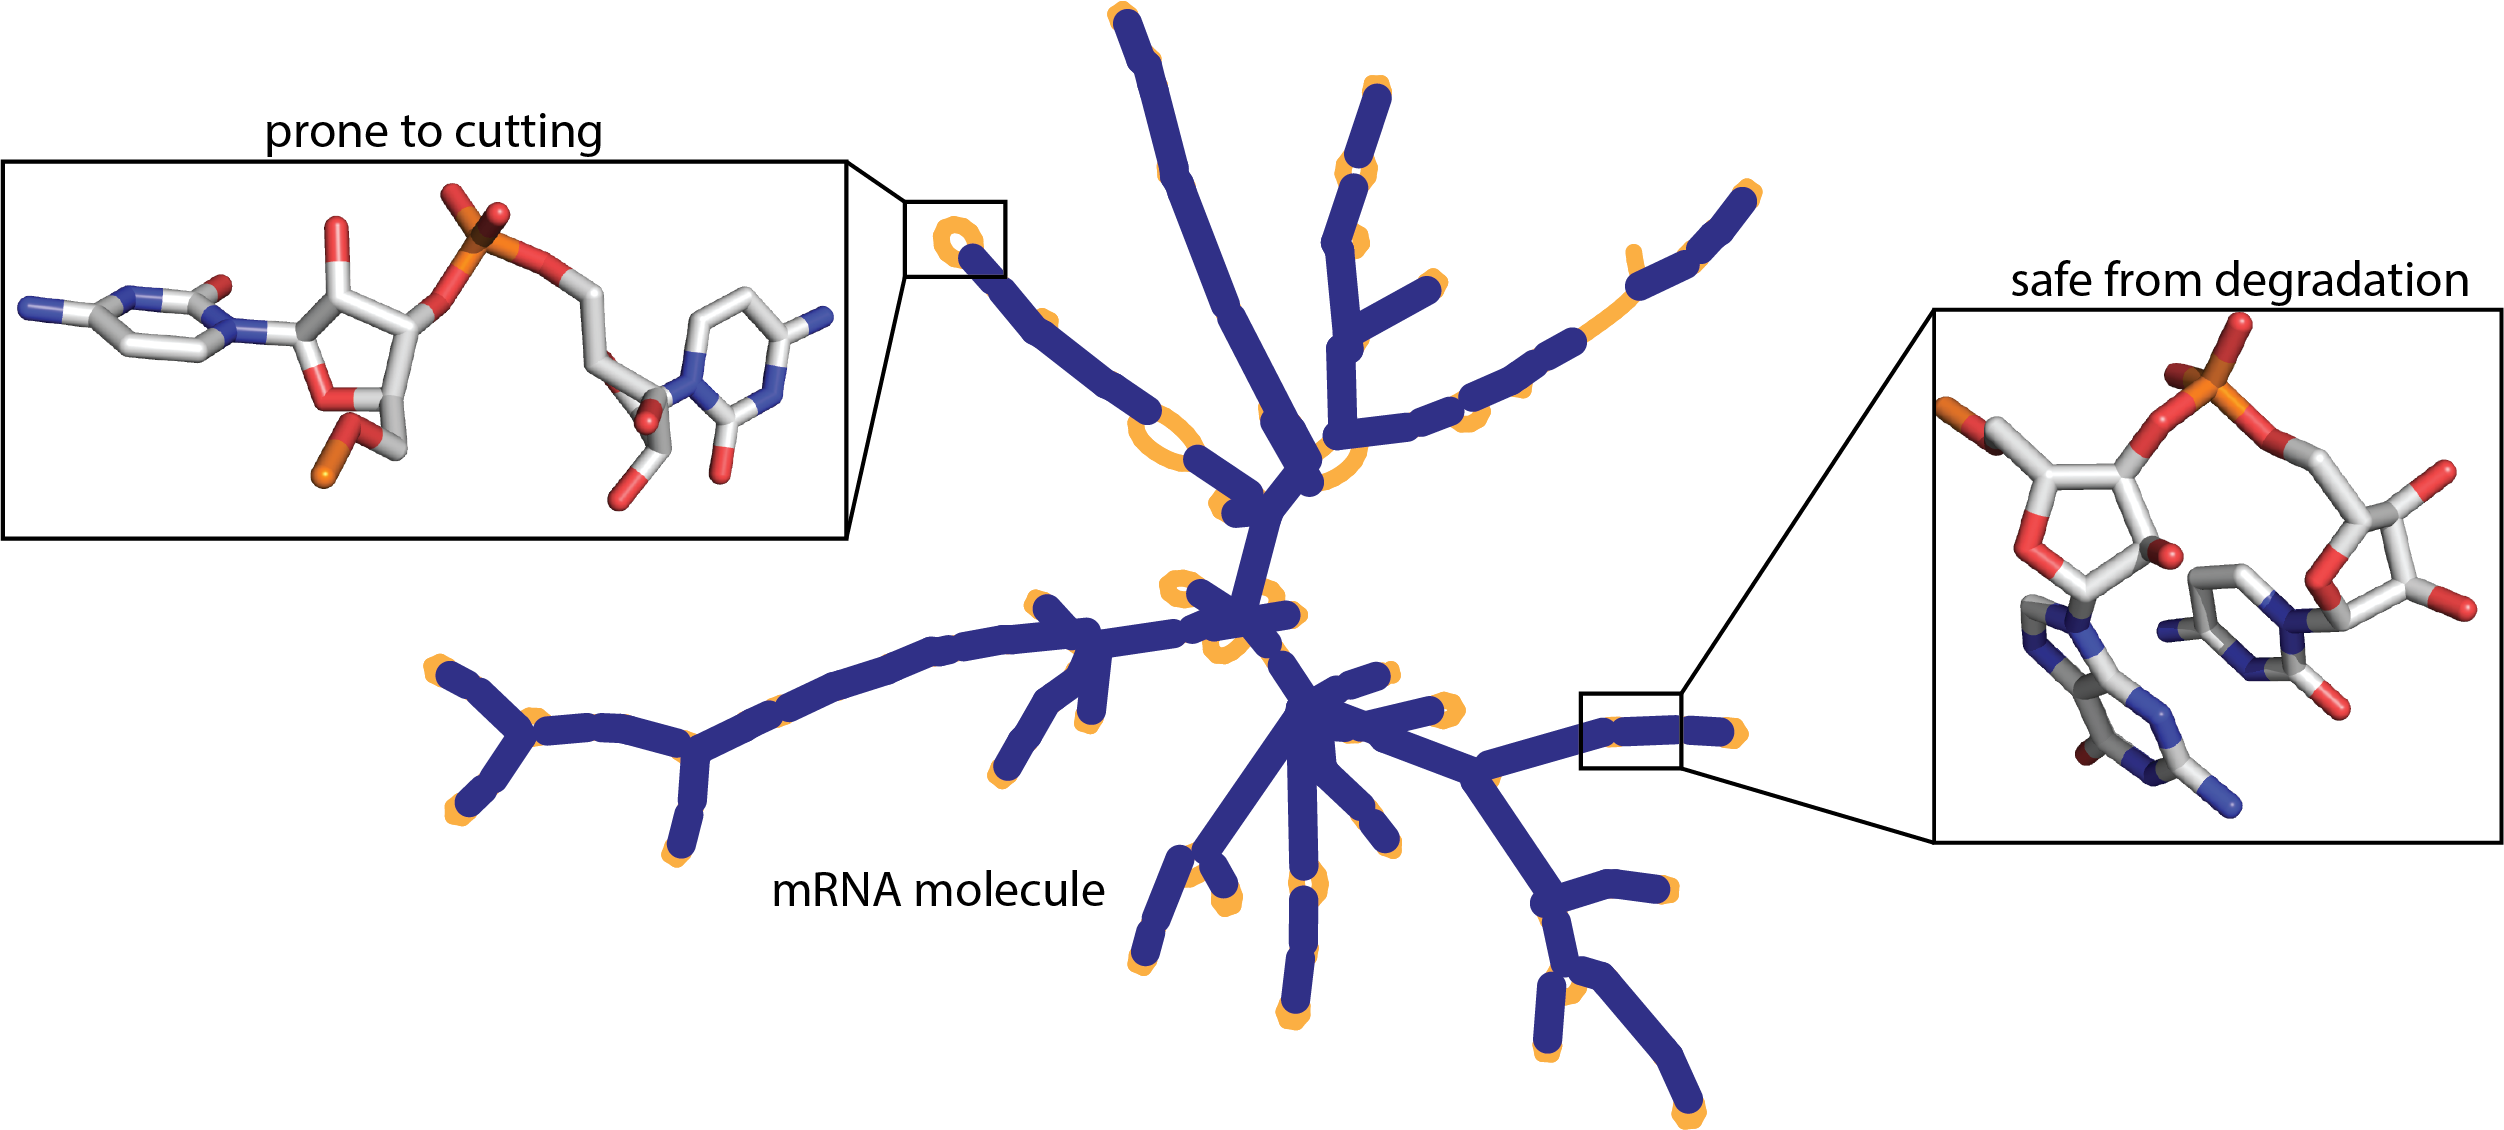
Each ribonucleotide base consists of a ribose sugar, a phosphate group, and a nitrogenous base .


Researchers have observed that RNA molecules have the tendency to **spontaneously degrade**. This is a serious limitation--a single cut can render the mRNA vaccine useless. Currently, little is known on the details of where in the backbone of a given RNA is most prone to being affected. Without this knowledge, current mRNA vaccines against COVID-19 must be prepared and shipped under intense refrigeration, and are unlikely to reach more than a tiny fraction of human beings on the planet unless they can be stabilized.

**Task:** To build a model which will predict likely degradation rates at each base of an RNA molecule which can be useful To develop models and design rules for RNA degradation.  




https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

**Sequence Prediction**

Sequence prediction is a problem that involves using historical sequence information to predict the next value or values in the sequence. The sequence may be symbols like letters in a sentence or real values like those in a time series of prices

**GRU**

The GRU, known as the Gated Recurrent Unit is an RNN architecture, which is similar to LSTM units. The GRU comprises of the reset gate and the update gate instead of the input, output and forget gate of the LSTM.

**Bidirectional RNNs**

In a bidirectional RNN, we consider 2 separate sequences. One from right to left and the other in the reverse order.

**Bidirectional Gated Recurrent Unit (GRU)**

Bidirectional GRU's are a type of bidirectional recurrent neural networks with only the reset and update gates. It allows for the use of information from both previous time steps and later time steps to make predictions about the current state.




In [1]:
#!pip install tensorflow

In [2]:
import json
import tensorflow as tf
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow.keras.layers as L
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set Seeds to ensure reproducibility
tf.random.set_seed(2020)
np.random.seed(2020)

##Loading the Data



In [4]:
import pandas as pd

try:
    with open('data.json', 'r') as f:
        data = json.load(f)  # Read the entire file as a JSON object

    data = pd.DataFrame(data)  # Convert the JSON object (likely a list of dictionaries) to a DataFrame
    print("File read successfully!")
    data.head()  # Display the first few rows of the DataFrame

except FileNotFoundError:
    print("Error: The file 'data.json' was not found.")
except ValueError as e:
    print(f"Error reading JSON: {e}")
    data = pd.read_json('data.json', lines = True)
except Exception as e:
    print(f"An unexpected error occurred: {e}")

File read successfully!


In [5]:
data.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1.0,107,68,"[0.1359, 0.207, 0.1633, 0.1452, 0.1314, 0.105,...","[0.2613, 0.3842, 0.1372, 0.2531, 0.1798, 0.137...","[0.2631, 0.286, 0.0964, 0.1574, 0.1, 0.1019, 0...","[0.1501, 0.275, 0.0947, 0.1866, 0.1369, 0.1148...","[0.2167, 0.3475, 0.188, 0.2124, 0.1703, 0.1481...","[0.3297, 1.5693, 1.1227, 0.8686, 0.7217, 0.438...","[0.7556, 2.983, 0.2526, 1.3789, 0.6376, 0.3313...","[2.3375, 3.506, 0.3008, 1.0108, 0.2635, 0.3403...","[0.3581, 2.9683, 0.2589, 1.4552, 0.7244, 0.497...","[0.6382, 3.4773, 0.9988, 1.3228, 0.7877, 0.589..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0.0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1.0,107,68,"[0.0931, 0.1329, 0.1128, 0.0891, 0.0844, 0.080...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.1702, 0.178, 0.111, 0.091, 0.0822, 0.1054, ...","[0.1033, 0.1464, 0.1126, 0.0962, 0.0906, 0.100...","[0.1498, 0.1761, 0.1517, 0.1167, 0.102, 0.1297...","[0.4482, 1.4822, 1.1819, 0.7434, 0.7148, 0.652...","[0.2504, 1.4021, 0.9804, 0.4967, 0.3653, 0.897...","[2.243, 2.9361, 1.0553, 0.721, 0.6396, 1.1473,...","[0.5163, 1.6823, 1.0426, 0.7902, 0.7477, 0.969...","[0.9501, 1.7975, 1.4991, 0.8686, 0.6893, 1.229..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0.0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0.0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.6202, 1.4981...","[4.2139, 3.9637, 3.2467, 2.4716, 1.2358, 1.235...","[3.0942, 3.015, 2.1212, 2.0552, 0.8815, 0.8815...","[2.6717, 2.4818, 1.9919, 2.5485, 1.6324, 2.020...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.4009, 0.0, 1.6317, ...","[2.1058, 3.138, 2.5437, 1.0932, 0.0, 0.0, 1.13...","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947, 0.7457, 3.1233, 0.8086, 2.205...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


## Data Description

The data described contains several fields, each representing different aspects of RNA sequence analysis and degradation studies. Here's how you can interpret these fields:

1. **sequence (1x107 string)**:
   - This is the RNA sequence composed of 107 nucleotides, represented by the letters A (Adenine), G (Guanine), U (Uracil), and C (Cytosine).
   - The sequence is important for understanding the structure and function of the RNA.
   - The first 68 nucleotides in this sequence are of particular interest because they correspond to positions specified in `seq_scored`.

2. **structure (1x107 string)**:
   - This string describes the secondary structure of the RNA sequence.
   - The characters used are:
     - `(` and `)` indicating that a base is paired with another base.
     - `.` indicating that a base is unpaired.
   - For example, a structure like `(..)` indicates that the first and last bases are paired, while the middle bases are unpaired.

3. **predicted_loop_type (1x107 string)**:
   - This string categorizes each base in the RNA sequence according to its structural context or "loop type".
   - The characters represent:
     - `S`: Stem, indicating the base is paired in a stem.
     - `M`: Multiloop, part of a multi-branched loop.
     - `I`: Internal loop, an unpaired region within a stem.
     - `B`: Bulge, a single-stranded region that bulges out from the stem.
     - `H`: Hairpin loop, a loop formed at the end of a stem.
     - `E`: Dangling end, unpaired bases at the end of a stem.
     - `X`: External loop, unpaired bases outside of secondary structures.

4. **reactivity (1x68 vector)**:
   - This is an array of floating-point numbers that indicate the reactivity of each of the first 68 bases in the RNA sequence.
   - High reactivity values suggest that the base is likely unpaired, while low reactivity indicates base pairing.

5. **deg_pH10 (1x68 vector)**:
   - This array represents reactivity values under conditions without magnesium and at a high pH (pH 10).
   - It provides insights into how stable each base/linkage is in these conditions.

6. **deg_Mg_pH10 (1x68 vector)**:
   - Similar to `deg_pH10`, but measured in the presence of magnesium.
   - Magnesium can stabilize RNA structures, so comparing this with `deg_pH10` can show how much magnesium influences degradation.

7. **deg_50C (1x68 vector)**:
   - This array represents reactivity values at high temperature (50°C) without magnesium.
   - It indicates how the RNA sequence behaves in terms of degradation at elevated temperatures.

8. **deg_Mg_50C (1x68 vector)**:
   - This array represents reactivity values at high temperature with magnesium present.
   - It provides insights into RNA stability under conditions combining both high temperature and magnesium.

These values are used to study the stability and degradation patterns of RNA sequences under various conditions, which is crucial for understanding their behavior in biological systems, especially in contexts like mRNA vaccines.



## Visualizing Distribution of Structure Molecules, Sequences and Predicted Loop Type

In [6]:
from functools import reduce
all_structures = reduce(lambda x,y:x+y, data['structure'].apply(list).tolist())
all_sequences = reduce(lambda x,y:x+y, data['sequence'].apply(list).tolist())
all_predicted_loop_types =  reduce(lambda x,y:x+y, data['predicted_loop_type'].apply(list).tolist())

In [7]:
len(all_structures)

256800

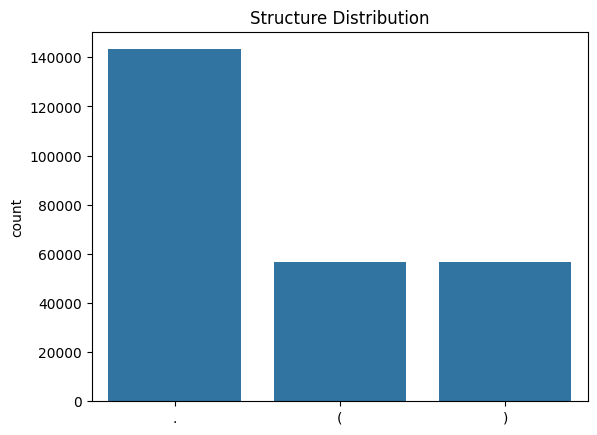

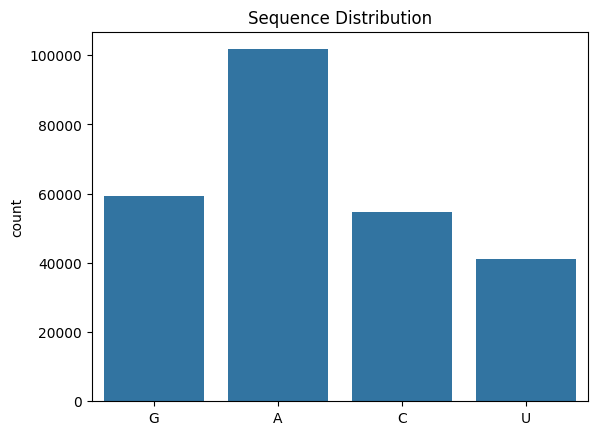

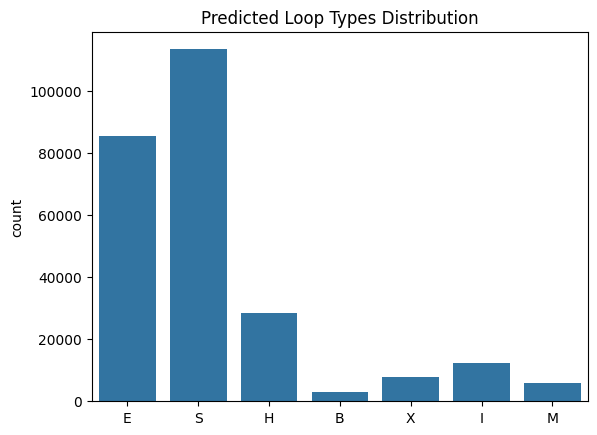

In [8]:
plt.title('Structure Distribution')
sns.countplot(x=all_structures)
plt.show()

plt.title('Sequence Distribution')
sns.countplot(x=all_sequences)
plt.show()

plt.title('Predicted Loop Types Distribution')
sns.countplot(x=all_predicted_loop_types)
plt.show()

# Plotting Average Reactivity at each Position

In [9]:
plt.style.use('fivethirtyeight')

avg_reactivity = np.array(list(map(np.array, data.reactivity))).mean(axis=0)
avg_deg_50C = np.array(list(map(np.array, data.deg_50C))).mean(axis=0)
avg_deg_pH10 = np.array(list(map(np.array, data.deg_pH10))).mean(axis=0)
avg_deg_Mg_50C = np.array(list(map(np.array, data.deg_Mg_50C))).mean(axis=0)
avg_deg_Mg_pH10 = np.array(list(map(np.array, data.deg_Mg_pH10))).mean(axis=0)


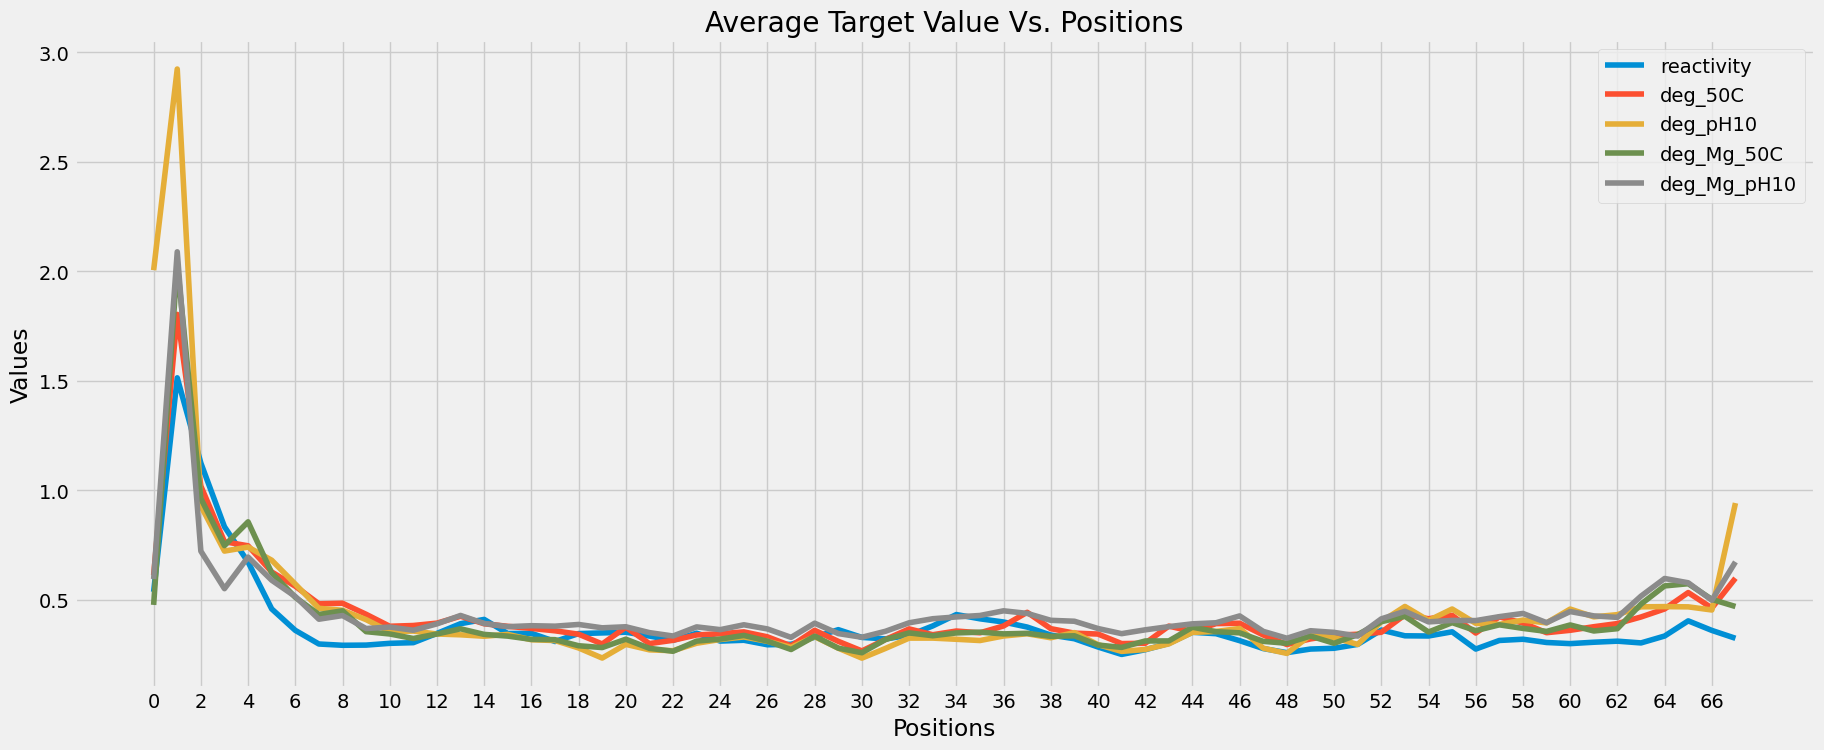

In [10]:
plt.figure(figsize=(20,8))
sns.lineplot(x=range(68),y=avg_reactivity, label = 'reactivity')
sns.lineplot(x=range(68),y=avg_deg_50C, label = 'deg_50C')
sns.lineplot(x=range(68),y=avg_deg_pH10, label = 'deg_pH10')
sns.lineplot(x=range(68),y=avg_deg_Mg_50C, label = 'deg_Mg_50C')
sns.lineplot(x=range(68),y=avg_deg_Mg_pH10, label = 'deg_Mg_pH10')

plt.xlabel('Positions')
plt.xticks(range(0,68,2))
plt.ylabel('Values')
plt.title('Average Target Value Vs. Positions')

plt.show()

## Preprocessing the Data

In [11]:
token2int = {x:i for i,x in enumerate('().ACGUBEHIMSX')}

In [12]:
def pandas_list_to_array(df):
  return np.transpose(
      np.array(df.values.tolist()),
      (0,2,1)
  )
def preprocess_inputs(df, token2int, cols=['sequence','structure',\
                                           'predicted_loop_type']):
  return pandas_list_to_array(df[cols].applymap(lambda seq: [token2int[x] for x in seq]))

In [13]:
pred_cols = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C',\
             'deg_pH10', 'deg_50C']

In [14]:
data_inputs = preprocess_inputs(data, token2int)
data_labels = pandas_list_to_array(data[pred_cols])

In [15]:
data_inputs

array([[[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       ...,

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]],

       [[5, 2, 8],
        [5, 2, 8],
        [3, 2, 8],
        ...,
        [3, 2, 8],
        [3, 2, 8],
        [4, 2, 8]]])

##Train Test Split

In [16]:
x_train, x_val, y_train, y_val = train_test_split(data_inputs, data_labels,
                                                    test_size=0.2, random_state=2020,
                                                    stratify = data.SN_filter
                                                    )

In [17]:
print(x_val.shape)
print(x_train.shape)

(480, 107, 3)
(1920, 107, 3)


In [18]:
# Check the shapes of your arrays before splitting
print("Shape of x_train before second split:", x_train.shape)
print("Shape of y_train before second split:", y_train.shape)
# print("Shape of data.SN_filter:", data.SN_filter.shape) # This line is not needed and may cause errors if data.SN_filter is not defined

# Assuming y_train contains class labels along the first axis,
# we'll extract them for stratification
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,
                                                    test_size=0.2, random_state=2020,
                                                    )

Shape of x_train before second split: (1920, 107, 3)
Shape of y_train before second split: (1920, 68, 5)


**MCRMSE**

Normally, we can calculate RMSE to get a single-number evaluation metric for our prediction, but if we are predicting multiple values at once, we need to predict degradation rates under multiple conditions, we would get multiple different RMSE values, one for each column.

The MCRMSE is simply an average across all RMSE values for each of our columns, so we can still use a single-number evaluation metric, even in the case of multiple outputs.

**Dense Layer**

The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models.


In [19]:


def MCRMSE(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis=1)

def gru_layer(hidden_dim, dropout):
    return L.Bidirectional(L.GRU(
        hidden_dim, dropout=dropout, return_sequences=True, kernel_initializer='orthogonal'
    ))

def build_model(embed_size, seq_len=107, sp_dropout=0.2, n_layers=3, hidden_dim=256, pred_len=68, num_outputs=5):
    inputs = L.Input(shape=(seq_len, 3))

    embed = L.Embedding(input_dim=embed_size, output_dim=200)(inputs)

    reshaped = L.Lambda(lambda x: tf.reshape(x, (-1, x.shape[1], x.shape[2] * x.shape[3])))(embed)

    hidden = L.SpatialDropout1D(sp_dropout)(reshaped)
    for x in range(n_layers):
        hidden = gru_layer(hidden_dim, 0.2)(hidden)

    truncated = hidden[:, :pred_len]
    out = L.Dense(num_outputs, activation='linear')(truncated)

    model = tf.keras.Model(inputs=inputs, outputs=out)
    model.compile(loss=MCRMSE, optimizer='adam', metrics=['accuracy'])
    return model


In [20]:
model = build_model(embed_size = len(token2int), num_outputs = 5)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 107, 3)]          0         
                                                                 
 embedding (Embedding)       (None, 107, 3, 200)       2800      
                                                                 
 lambda (Lambda)             (None, 107, 600)          0         
                                                                 
 spatial_dropout1d (Spatial  (None, 107, 600)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 107, 512)          1317888   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 107, 512)          118272

**Epoch** is once all images are processed one time individually of forward and backward to the network, then that is one epoch.

**Learning Rate**  

Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.

**ReduceLROnPlateau**

Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.



In [21]:

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', factor=0.05, patience=5, min_lr=1e-6),
    tf.keras.callbacks.ModelCheckpoint(filepath = 'model.keras', save_best_only = True)
]
history = model.fit(
    x_train, y_train,
    epochs = 25,
    batch_size = 32,
    validation_data = (x_val, y_val),
    callbacks = callbacks
)


Epoch 1/25
48/48 [==============================] - 18s 114ms/step - loss: 0.5995 - accuracy: 0.2960 - val_loss: 0.5452 - val_accuracy: 0.3459 - lr: 0.0010
Epoch 2/25
48/48 [==============================] - 3s 58ms/step - loss: 0.5361 - accuracy: 0.3341 - val_loss: 0.5148 - val_accuracy: 0.3634 - lr: 0.0010
Epoch 3/25
48/48 [==============================] - 3s 59ms/step - loss: 0.5175 - accuracy: 0.3562 - val_loss: 0.5015 - val_accuracy: 0.3710 - lr: 0.0010
Epoch 4/25
48/48 [==============================] - 3s 59ms/step - loss: 0.5031 - accuracy: 0.3619 - val_loss: 0.4896 - val_accuracy: 0.3744 - lr: 0.0010
Epoch 5/25
48/48 [==============================] - 3s 58ms/step - loss: 0.4909 - accuracy: 0.3736 - val_loss: 0.4781 - val_accuracy: 0.3748 - lr: 0.0010
Epoch 6/25
48/48 [==============================] - 3s 56ms/step - loss: 0.4817 - accuracy: 0.3830 - val_loss: 0.4699 - val_accuracy: 0.3989 - lr: 0.0010
Epoch 7/25
48/48 [==============================] - 3s 60ms/step - loss: 0

## Plotting

The **History.history** attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

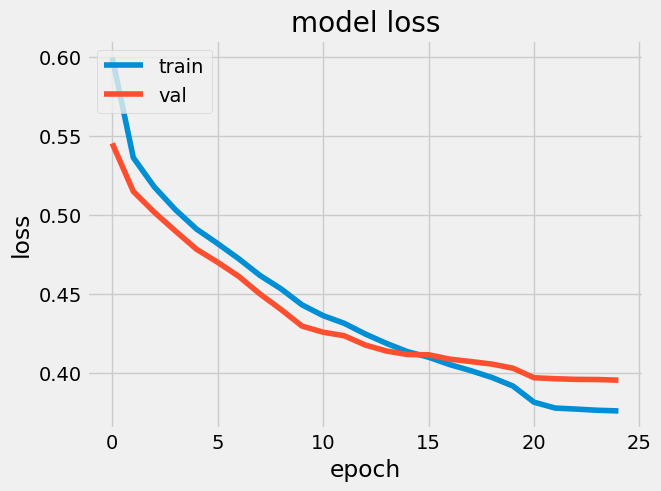

In [22]:
from matplotlib import pyplot as pyplot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

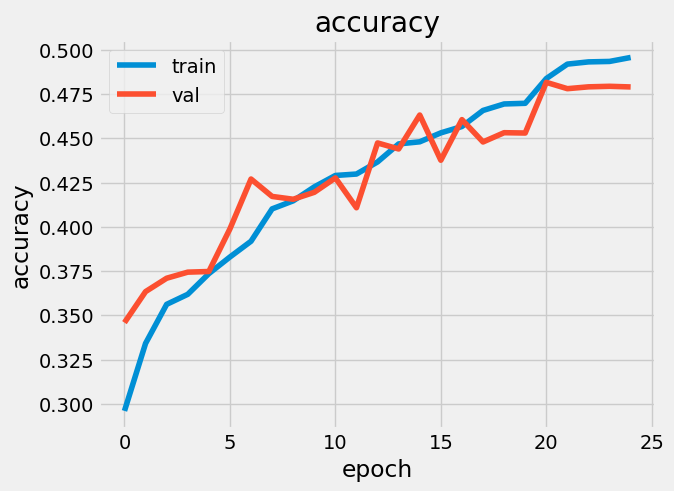

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluation

Returns the loss value & metrics values for the model.

In [24]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 18ms/step - loss: 0.3286 - accuracy: 0.4902


[0.3286055624485016, 0.490234375]

## Prediction

Generates output predictions for the input samples.


In [25]:

y_prediction = model.predict(x_test)
y_prediction.shape
print(pd.DataFrame(y_prediction[1]))

pred_cols = ['reactivity','deg_Mg_pH10','deg_Mg_50C','deg_pH10','deg_50C']


12/12 [==============================] - 3s 35ms/step
           0         1         2         3         4
0   0.440113  0.498503  0.431116  1.776072  0.578794
1   0.940267  1.188614  1.087635  1.689521  1.090312
2   1.066178  0.856759  1.127214  0.948469  0.992552
3   0.727446  0.579788  0.765465  0.662648  0.891236
4   0.195415  0.367801  0.462673  0.453365  0.480486
..       ...       ...       ...       ...       ...
63  0.005165  0.197592  0.167416  0.221342  0.076566
64  0.079519  0.252087  0.242854  0.365239  0.213989
65  0.103593  0.483729  0.426850  0.561965  0.291712
66  0.155651  0.339661  0.354275  0.572920  0.362725
67  0.563178  0.737702  0.541717  1.201854  0.827960

[68 rows x 5 columns]


In [26]:

def degradation_sample(index):
    orig_cols = ['reactivity','deg_Mg_pH10','deg_Mg_50C','deg_pH10','deg_50C']
    pred_cols = ['reactivity_prediction','deg_Mg_pH10_prediction','deg_Mg_50C_prediction','deg_pH10_prediction','deg_50C_prediction']
    predicted_df = pd.DataFrame(y_prediction[index],columns=pred_cols)
    original_df = pd.DataFrame(y_test[index],columns=orig_cols)
    ori_predicted_df = pd.concat([original_df,predicted_df],axis=1)
    return ori_predicted_df

degradation_sample(38)



,reactivity,deg_Mg_pH10,deg_Mg_50C,deg_pH10,deg_50C,reactivity_prediction,deg_Mg_pH10_prediction,deg_Mg_50C_prediction,deg_pH10_prediction,deg_50C_prediction
0,0.7447,0.4253,0.4067,2.8121,0.4834,0.473897,0.548950,0.434863,1.626402,0.597126
1,1.4522,1.1555,0.5568,1.6836,0.3615,1.097102,1.435416,1.332923,1.865659,1.365706
2,1.6859,1.0602,1.1875,0.8324,1.0498,1.102162,0.846531,1.054046,1.006336,1.326903
3,0.9875,0.6516,0.5427,0.4590,0.4679,0.810998,0.459616,0.639732,0.522657,0.760690
4,0.5961,0.3193,0.5994,0.4338,0.2862,0.481952,0.507684,0.645622,0.399680,0.472680
...,...,...,...,...,...,...,...,...,...,...
63,0.0188,0.2052,0.1482,0.1163,0.1528,0.061722,0.185721,0.117812,0.134937,0.146957
64,0.0171,0.1632,0.2781,0.2043,0.2479,-0.029480,0.200467,0.182744,0.096379,0.136790
65,0.0451,0.4213,0.3671,0.3316,0.4265,0.114349,0.520916,0.458872,0.262788,0.315553
66,0.0389,0.2361,0.1812,0.1964,0.3020,0.174895,0.216655,0.235999,0.157505,0.181286


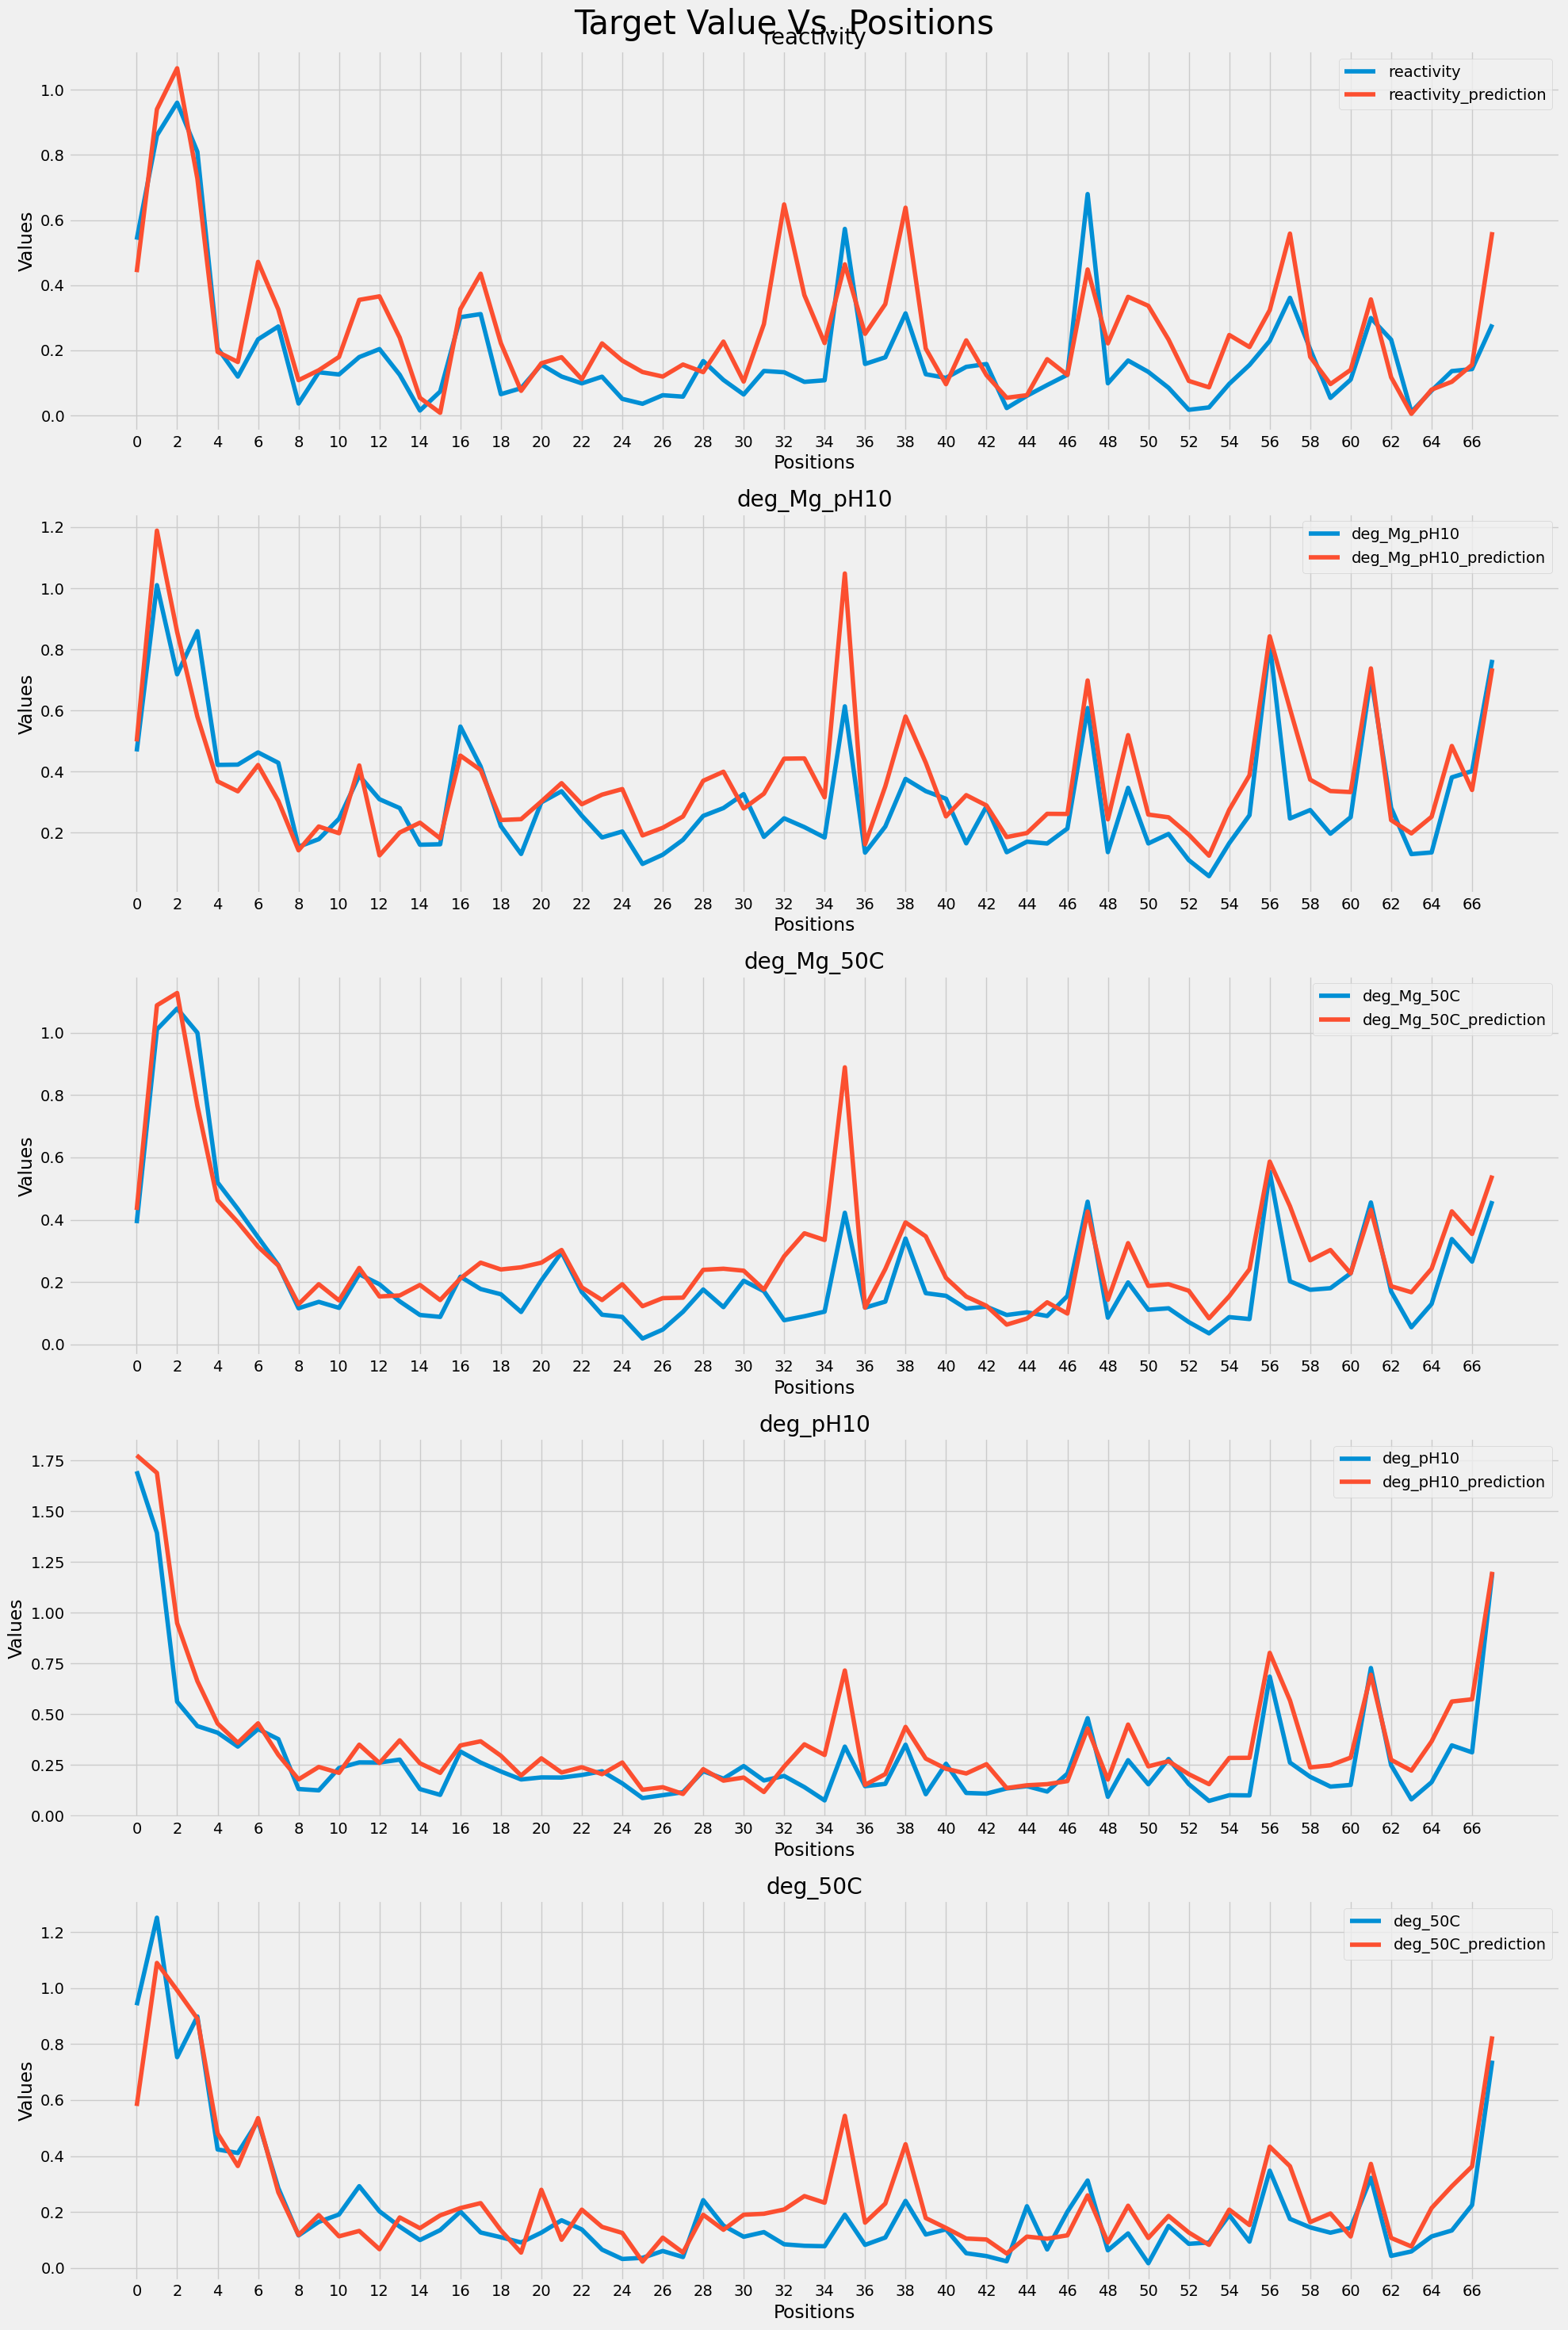

In [27]:
def plot_degradation(df, title):
  """Plots the degradation values for original and predicted values for one 384 values.

  Args:
    df: DataFrame containing the original and predicted degradation values.
    title: Title of the plot.
  """
  plt.figure(figsize=(20, 30))

  for i in range(5):  # Loop through the 5 degradation types
    plt.subplot(5, 1, i + 1)  # Create subplots
    sns.lineplot(x=range(68), y=df.iloc[:, i], label=df.columns[i])  # Original values
    sns.lineplot(x=range(68), y=df.iloc[:, i + 5], label=df.columns[i + 5])  # Predicted values
    plt.xlabel('Positions')
    plt.xticks(range(0, 68, 2))
    plt.ylabel('Values')
    plt.title(df.columns[i])  # Set title based on degradation type

  plt.suptitle(title, fontsize=30)  # Set overall title
  plt.tight_layout()
  plt.show()

# Assuming degradation_sample(0) returns the DataFrame you want to plot
df = degradation_sample(1)
plot_degradation(df, 'Target Value Vs. Positions')